# Hazard models

**Aging** - increased chance of death with age.

You have seen this picture on the previous lesson {cite}`lifetables`.  

![Risk of mortality](https://upload.wikimedia.org/wikipedia/en/4/4d/USGompertzCurve.svg)

At this lesson we learn how to understand such mortality risk curves and much more. We will learn Gompertz model - the central conception in aging research.

## Survival curves

Let $T$ is a non-negative random variable with a corresponding distribution function:
$$F_T(t) = P(T\leq t)$$ 
We call $T$ - *survival time* or time before death of some object (e.g. human). For example, $T$ can have normal distribution:

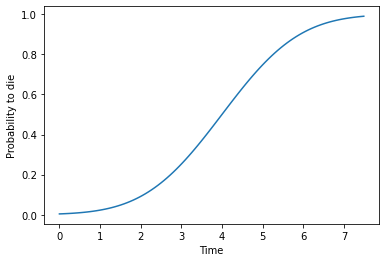

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

rv = norm(loc=4, scale=1.5)
x = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to die')
ax.plot(x, rv.cdf(x));

If $F_T(t)$ is a probability to die before time moment $T$ we can introduce a probability to survive before this moment $S$ as just a complement to $F$:
$$S_T(t) = P(T > t) = 1 - F_T(t)$$ 

Let's draw it:

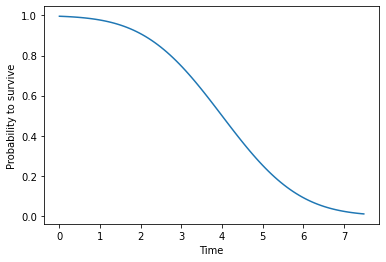

In [2]:
rv = norm(loc=4, scale=1.5)
x = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to survive')
ax.plot(x, 1 - rv.cdf(x));

This plot is what we actually call *survival curve*. The intuition behind this is rather straightforward - it shows how many of experimental objects survived before a partucular moment of time. You can see a lot of empirical versions of such curves in articles. Rigorous analysis of this curves helps to avoid a misinterpretation of typical drug-testing experiment or other. And it's what we are going to do in further.

## Hazard function

In [3]:
from lifelines.datasets import load_waltons

In [4]:
load_waltons()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


In [5]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

NameError: name 'cycler' is not defined

## Learn more

* [Russian video lecture](https://www.youtube.com/watch?v=rLNzoYmnkgQ&ab_channel=ComputerScienceCenter).
* [Gompertz model colab notebook by Alexander Fedintsev](https://colab.research.google.com/drive/1Po-OMzIJ_4hVVj5O7btc8OmjJlu0N3cQ?usp=sharing#scrollTo=-_cpx007cIMn)
* [Python library for hazard modeling](https://lifelines.readthedocs.io/en/latest/index.html)

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)